In [1]:
from myRender import *
import time


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


# Rendering the obj model

Center: [ 0.02937406  0.52543557 -0.03846204]
Radius: 1.9841195344924927
--------------------------
Bounding Sphere duration: 0.08969712257385254 seconds
--------------------------
We have 3393 vertices and 5328 faces.
--------------------------
Rendering Images duration: 16.680372953414917 seconds
--------------------------


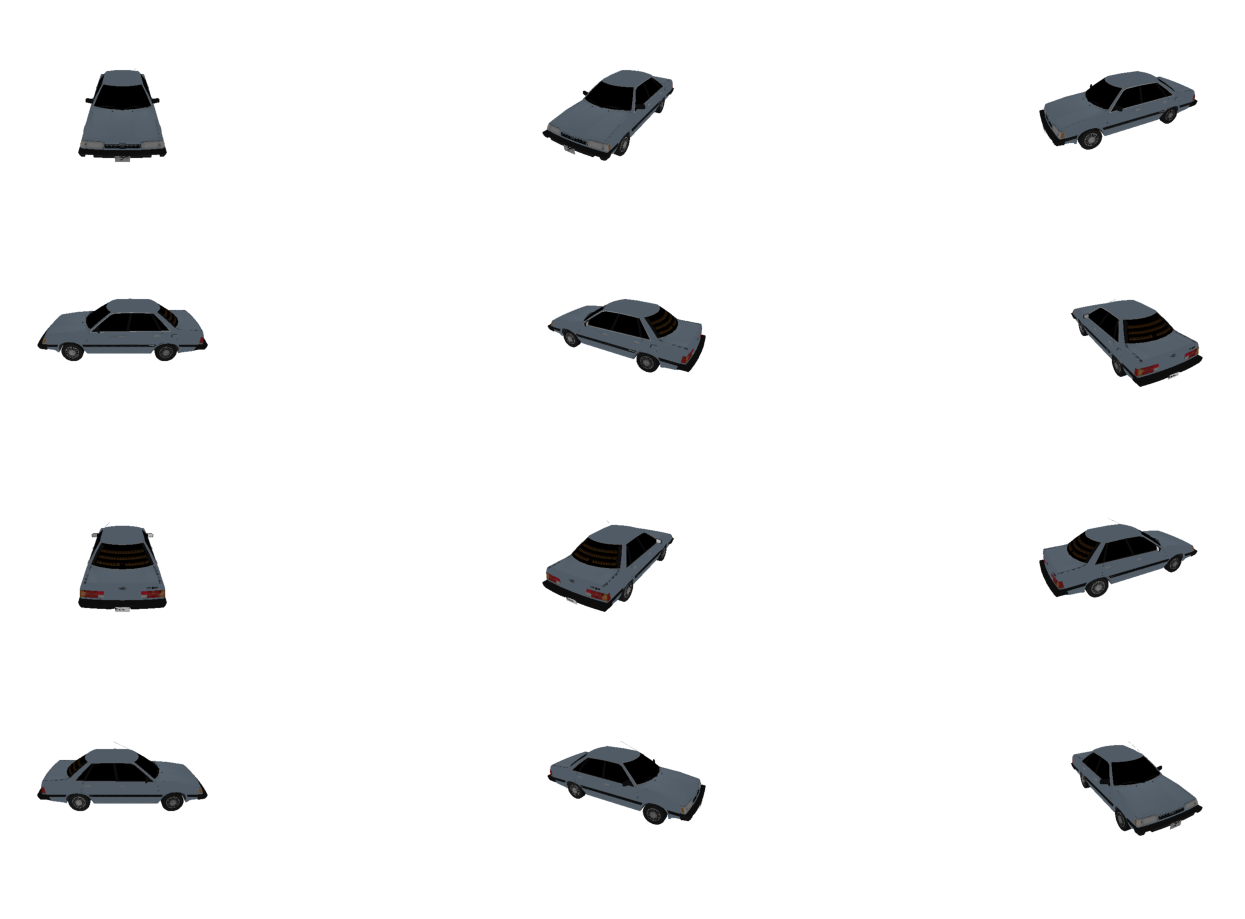

In [2]:
#all_start = time.time()
# defining the parameters
ontology_path = "./ontologies/transportation.owl"
obj_filename = "data/subaru/_Subaru-Loyale.obj"
image_size = 512 # size of rendered images in pixels
batch_size = 12 # number of pictures to take


#obj_filename = "data/cow_mesh/cow.obj"
#obj_filename = "data/Jeep_Renegade_2016_obj/Jeep_Renegade_2016.obj"
#obj_filename = "data/FA-18F/FA-18F.obj"
#obj_filename = "data/OH-58D/OH-58D.obj"
#obj_filename = "data/electrictrain/electrictrain.obj"


start = time.time()
center, radius = bounding_sphere_exact_from_obj(obj_filename)
print(f"Center: {center}")
print(f"Radius: {radius}")
end = time.time()
print('--------------------------')
print('Bounding Sphere duration: {} seconds'.format(end - start))
print('--------------------------')


start = time.time()

images = myRender(
    obj_filename=obj_filename,
    camera_dist=radius*2.5, # distance of the camera from the object or scale of the object (2 -> 5, radius*2.5)
    elevation=30, # elevation is the elevation of the camera 
    azim_angle=0, # Azimuth Angle is the rotation of the object (it doesn't need to be set)
    image_size=image_size, # size of image in pixels
    batch_size=batch_size # number of pictures to take
)

# convert result of render to PIL
images_read = tensor_to_PIL_images(images)

end = time.time()
print('--------------------------')
print('Rendering Images duration: {} seconds'.format(end - start))
print('--------------------------')

# Plot the rendered images
image_grid(images.cpu().numpy(), cols=3, rows=4, rgb=True)


# fetching the ontology

#start = time.time()
#ontology = fetch_ontology(ontology_path)

# run prediction on all images
#prediction_value, prediction_class = predict_image_ontology (images_read[0], ontology_path, False)
#end = time.time()
#print('--------------------------')
#print('Running Predictions with Ontology duration: {} seconds'.format(end - start))
#print('--------------------------')

#all_end = time.time()
#print('--------------------------')
#print('Duration of the whole process: {} seconds'.format(all_end - all_start))
#print('--------------------------')

In [5]:
predictions_class_list = []
predictions_value_list = []

CLIP_start = time.time()
ontology = fetch_ontology(ontology_path)
for i in range(len(images_read)):
    prediction_value, prediction_class = predict_image_ontology (images_read[i], ontology_path, False)
    predictions_class_list.append(prediction_class)
    predictions_value_list.append(prediction_value)
    print('-------------------')
    print('image index: {}'.format(i))
    print(prediction_class)
    print(prediction_value)
    print('-------------------')
CLIP_end = time.time()
print('--------------------------')
print('Duration of CLIP predictions for 12 images: {} seconds'.format(CLIP_end - CLIP_start))
print('--------------------------')

-------------------
image index: 0
Car
0.9999303817749023
-------------------
-------------------
image index: 1
Car
0.9999884366989136
-------------------
-------------------
image index: 2
Car
0.9999911785125732
-------------------
-------------------
image index: 3
Car
0.999971866607666
-------------------
-------------------
image index: 4
Car
0.9999829530715942
-------------------
-------------------
image index: 5
Car
0.9999825954437256
-------------------
-------------------
image index: 6
Car
0.9999102354049683
-------------------
-------------------
image index: 7
Car
0.9999703168869019
-------------------
-------------------
image index: 8
Car
0.9999727010726929
-------------------
-------------------
image index: 9
Car
0.9999418258666992
-------------------
-------------------
image index: 10
Car
0.9999921321868896
-------------------
-------------------
image index: 11
Car
0.9999845027923584
-------------------
--------------------------
Duration of CLIP predictions for 12 

[0.9999303817749023,
 0.9999884366989136,
 0.9999911785125732,
 0.999971866607666,
 0.9999829530715942,
 0.9999825954437256,
 0.9999102354049683,
 0.9999703168869019,
 0.9999727010726929,
 0.9999418258666992,
 0.9999921321868896,
 0.9999845027923584]

In [11]:
probs = PIL_image_to_probs(images_read[0], ['Vehicle, Aircraft, Plane', 'Vehicle, Landcraft, Car', 'Vehicle, Landcraft, Train'])

In [12]:
probs

[0.00037452243850566447, 0.9808634519577026, 0.018762025982141495]